# Web scraping all courses on Harvard University Site for different difficulty   levels using Python


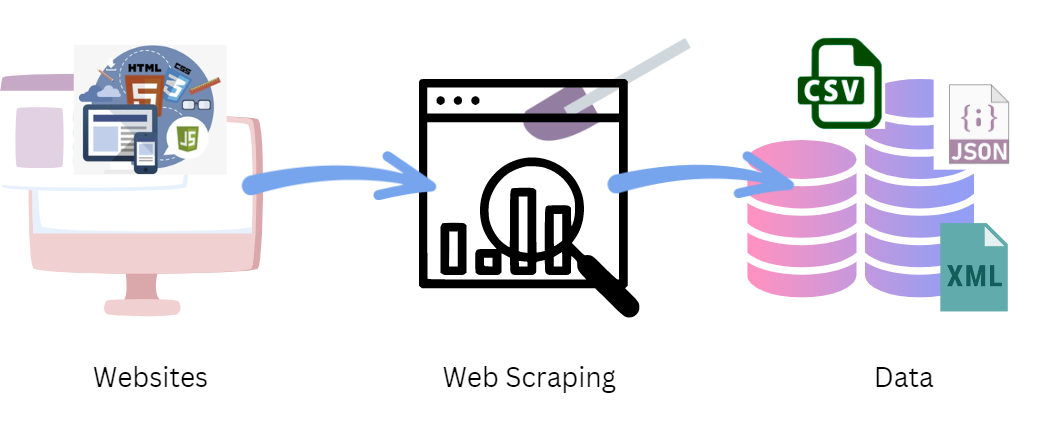










Web scraping is the process of automatically extracting and parsing data fom websites using a program or tool.Scraping often involves accessing a website's HTML code, parsing and extracting the required information.Web scarping purposes are not just limited to research, infact they are also widely used in business intelligence, building machine learning applications database and also to monitor website changes.
Though web scarping can also be done manually,but using tool or library are considered more efficient.Popular web scarping tools and libraries are Beautiful Soup,Selenium,Scrapy and Puppeteer.

Importantly, While web scraping some data which are copyrighted or private can lead to legal and ethical concerns.Therefore, one should always respect terms of use and laws of website when scarping.

Harvard University is a prestigious and well-known university that offers wide range of courses covering variety of subjects such as computer science, public health, history, literature and much more. Many students across the globe with engaging lectues and challenging assignments found Harvard's courses to be of high quality. 
The courses are available to all learners irrespective of their background or experience.

However, it is important to carefully opt for the courses which alligns with our interests, level of knowledge or expertise and learning mode preferences and also goals.

### Problem Statement:

Write a Python function to scrape all course data from multiple pages of the **Harvard University Website** based on different difficulty level of courses. Also, write a function to create three CSV(commo-separated values) files , one for each level of course : Introductory, Intermediate, and Advanced. The output CSV should contain course details : course title, course subject area, course modality, course description, course price, and also course link.



#### Tools and libraries required:

*Chrome's Inspect tool :*

Chrome's Inspect tool is a built-in web development tool which can also be used for web scraping besides used to view or modify code, debug and analyze performance of page.
It helps to examine the website's HTML and CSS code structure.Making easy to identify specific elements needed to extract desired data from a website.

Let's explore Harvard University courses page's HTML structure and identify specific elements such as classes or tags.
Navigating to the website using URL : https://pll.harvard.edu/catalog and now right-click on the web page to open the inspect tool and select "Inspect" or press Ctrl+Shift+I (Windows/Linux) or Cmd+Shift+I (Mac) keyboard shortcut.


*Libraries used :*

1. Requests 
2. Beautiful Soup 
3. selenium


### Downloading webpage using Python Library 'requests'
Let's start by using Python's library requests to download web page content.
Library requests can be used to fetch the HTML content of a page and also interact with web APIs.

In [1]:
# Install the library requests
!pip install requests

In [2]:
# import library requests
import requests

As per problem statement we will collect course details based on course difficulty level which are :Introductory, Intermediate and Advanced.
We will start with extracting details for Introductory course and later make generic function for all levels.

In [20]:
#  url of the page to download
url="https://pll.harvard.edu/catalog?keywords=&max_price=&start_date_range%5Bmin%5D%5Bdate%5D=&start_date_range%5Bmax%5D%5Bdate%5D=&difficulty%5B%5D=introductory"
# to retrieve the data we have to send HTTP GET request to the URL
response=requests.get(url)


requests.get() returns a response object which has page contents and other information such as status code which indicates whether the request was successful or not.
The value of successful request is between 200 and 299.

In [21]:
# status code check
response.status_code

200

To get HTML content of the webpage use .text property

In [22]:
# content of webpage
page_contents= response.text

As the might contain thousands of characters, lets view first 1000 characters.

In [23]:
page_contents[:1000]

'<!DOCTYPE html>\n<!--[if IEMobile 7]><html class="iem7"  lang="en" dir="ltr"><![endif]-->\n<!--[if lte IE 6]><html class="lt-ie9 lt-ie8 lt-ie7"  lang="en" dir="ltr"><![endif]-->\n<!--[if (IE 7)&(!IEMobile)]><html class="lt-ie9 lt-ie8"  lang="en" dir="ltr"><![endif]-->\n<!--[if IE 8]><html class="lt-ie9"  lang="en" dir="ltr"><![endif]-->\n<!--[if (gte IE 9)|(gt IEMobile 7)]><!--><html  lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#"><!--<![endif]-->\n\n<head>\n  <!--[if IE]><![endif]-->\n<link rel="dns-prefetch" href="//www.klaviyo.com" />\n<link rel="preconnect" href="//www.klaviyo.com" />\n<meta charset="utf-8" /><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-da

The above output is the source code of webpage written in HTML defining contents and structure.
Let's save the contents to a file with .html extension.

In [24]:
with open('Intro_courses.html', 'w', encoding="utf-8") as file:
    file.write(page_contents)

We pass encoding="utf-8" parameter to the open() function to ensure any non-ASCII characters present in page_contents variable to be stored correcty in the file "Intro_courses.html".
Now the file "Intro_courses.html" is created in the same directory and can be viewed by " File>Open" menu option within jupyter.
Below is what we will se when we open the file : 






It is simply a copy and none of the links or button works.

### Using Beautiful Soup Library to extract data from HTML source code 
 
Beautiful Soup is Python library or Python's parsing library for web scarping which simplifies the extracting and parsing of data from HTMl and XMl documents.It can be used with other libraries of Python , such as Pandas and requests to collect and process data from the web in the automated fashion.
This library extracts specific pieces of data from the HTML code based on their tag names, attributes, and class names.

In [25]:
# Install the library BeautifulSoup4
!pip install BeautifulSoup4

In [26]:
#Import the library
from bs4 import BeautifulSoup

Let's first read the content of the file "Intro_courses.html".
Secondly, create an object of Beautiful Soup by passing the HTML content to BeautifulSoup constructor.
We will use the Beautiful Soup object to parse the content.

In [27]:
# read the contents
with open('Intro_courses.html','r') as f:
    html_source=f.read()

In [28]:
#to have a look into html_source
html_source[:10000]

'<!DOCTYPE html>\n<!--[if IEMobile 7]><html class="iem7"  lang="en" dir="ltr"><![endif]-->\n<!--[if lte IE 6]><html class="lt-ie9 lt-ie8 lt-ie7"  lang="en" dir="ltr"><![endif]-->\n<!--[if (IE 7)&(!IEMobile)]><html class="lt-ie9 lt-ie8"  lang="en" dir="ltr"><![endif]-->\n<!--[if IE 8]><html class="lt-ie9"  lang="en" dir="ltr"><![endif]-->\n<!--[if (gte IE 9)|(gt IEMobile 7)]><!--><html  lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#"><!--<![endif]-->\n\n<head>\n  <!--[if IE]><![endif]-->\n<link rel="dns-prefetch" href="//www.klaviyo.com" />\n<link rel="preconnect" href="//www.klaviyo.com" />\n<meta charset="utf-8" /><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-da

In [29]:
# create an Beautiful Soup Object
web_doc=BeautifulSoup(html_source,'html.parser')
web_doc

<!DOCTYPE html>

<!--[if IEMobile 7]><html class="iem7"  lang="en" dir="ltr"><![endif]-->
<!--[if lte IE 6]><html class="lt-ie9 lt-ie8 lt-ie7"  lang="en" dir="ltr"><![endif]-->
<!--[if (IE 7)&(!IEMobile)]><html class="lt-ie9 lt-ie8"  lang="en" dir="ltr"><![endif]-->
<!--[if IE 8]><html class="lt-ie9"  lang="en" dir="ltr"><![endif]-->
<!--[if (gte IE 9)|(gt IEMobile 7)]><!--><html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#"><!--<![endif]-->
<head>
<!--[if IE]><![endif]-->
<link href="//www.klaviyo.com" rel="dns-prefetch"/>
<link href="//www.klaviyo.com" rel="preconnect"/>
<meta charset="utf-8"/><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window

In [30]:
type(web_doc)

bs4.BeautifulSoup

The web_doc is now a Beautiful Soup object which has several properties and methods for extracting data from HTML document.


In [31]:
# class value
selection_class = 'group-right'
intro_courses_tag=web_doc.find_all('div',selection_class)
intro_courses_tag

[<div class="group-right">
 <div class="group-topic-series field-group-div"><div class="group-series-topic field-group-div"><div class="field field-name-subject-area"><span class="fas fa-users"></span><a aria-label="See more courses in the Humanities subject" href="/subject/humanities">Humanities</a></div></div></div><div class="field field-name-modality"><span>Online</span></div><div class="field field-name-title-qs"><h3><a href="/course/predictionx-lost-without-longitude?delta=0">PredictionX: Lost Without Longitude</a></h3></div><div class="field field-name-field-course-summary">Explore the history of navigation, from stars to satellites.</div><div class="group-bottom-fields field-group-div"><div class="field field-name-price"><span>Free<sup>*</sup></span></div><div class="field field-name-duration">1 week long</div><div class="field field-name-start-date">Available now</div></div> </div>,
 <div class="group-right">
 <div class="group-topic-series field-group-div"><div class="group-s

#### Accessing tags

HTML class tag is an attribute used to group elements based on their common functionality or characteristics.
Our HTML document :

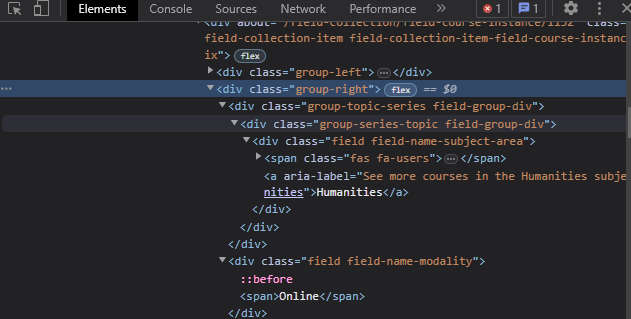







In the above example, the 'div' element has a class attribute with a value of "group-right". We can use this class value to select all the elements inside this section using a web scraping library BeautifulSoup. 
We will use the find_all() method to find all the <div> element with a class of "group-right".


Now, we will find course titles,subject area, mode of learning, course description, and price using their associated elements inside the class section of value "group-right".
For Course title: the <div> element has class value of "field field-name-title-qs"

In [32]:
# introductory course titles
intro_course_title1 = web_doc.find('div', class_='field field-name-title-qs').text
intro_course_title1

'PredictionX: Lost Without Longitude'

We will have to do this to extract the rest of the titles inside the above mention section.
Let's use for loop to : find all the titles.

Steps: 
* Initialize an empty list named : title_datset.
  We will add values to this list using append() method.
* For loop: To get all the titles in the page.
* .text is attribute that can be used to extract the text content.
* print all the extracted titles of the page.

In [33]:
# initialize an empty list
title_dataset=[]

# for loop to find and print all the titles inside the 'group-right' div
for titles in intro_courses_tag:
    intro_course_title = titles.find('div', class_='field field-name-title-qs').text
    title_data={
        "Intro_Course_Title":titles.find('div', class_='field field-name-title-qs').text
    }
    title_dataset.append(title_data)
    print(f"Title: {intro_course_title}")

Title: PredictionX: Lost Without Longitude
Title: PredictionX: John Snow and the Cholera Epidemic of 1854
Title: CS50: Introduction to Computer Science
Title: Cognitive Fitness
Title: 6-Week Plan For Healthy Eating
Title: Back Pain: Finding Solutions for Your Aching Back
Title: Controlling your Blood Pressure
Title: Starting to Exercise
Title: Improving your Memory 
Title: An Introduction to Tai Chi
Title: PredictionX: Omens, Oracles & Prophecies
Title: Systematic Approaches to Policy Design
Title: Exercises for Bone Strength
Title: Healthy Eating for Type 2 Diabetes
Title: New Ideas for Nonprofit Leaders Webinar


The output that we see is only for titles on a single page, moving further will extract all the titles of all the pages under various difficulty level : Introductory, Intermediate  and Advanced.
We need to follow the same steps for subject area, mode of learning, course description, and price. 
Just will have inspect elements for each one of those.

Let's write function to download the pages.

#### Function to download the pages.

In [34]:
#Importing required libraries
import requests
from bs4 import BeautifulSoup

from selenium import webdriver
from time import sleep, time
from random import randint

# function to download page for a given page no. and level of difficulty
def get_courses_page(page, diff):
    
    # passing the url as f-string literal to include values of 'page' and 'diff'
    url = f'https://pll.harvard.edu/catalog?keywords=&max_price=&start_date_range%5Bmin%5D%5Bdate%5D=&start_date_range%5Bmax%5D%5Bdate%5D=&difficulty%5B0%5D={diff}&page={page}'
    
    # to automate interactions with a website using Google chrome web browser
    driver = webdriver.Chrome()
    
    # get() method to navigate to the url and driver object wait untill page loads completely before returning
    driver.get(url)
    
    # sends a GET request to the current URL that the driver object is currently on
    response = requests.get(driver.current_url)
    
    # to get the status code of HTTP response returned by server 
    status_code = response.status_code
    
    # random pause between 2 and 10 seconds to avoid sending requests too frequently 
    sleep(randint(2, 10))
    
    #raise an exception if the HTTP response status code is not equal to 200 
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(url))
        
    # driver.page_source is a property of webdriver to get HTML souce code of the page.    
    doc = BeautifulSoup(driver.page_source, 'html.parser')
    return doc


The 'return source_doc' return BeautifulSoup object 'source_doc' to the function which can be now used to navigate HTML document or also known as HTML source code and extract specific elements or attributes from the page.

#### Function to get all course details 

We will now extract course title,subject area of the course,mode of learning course such as Online, In-person, blended, and Online live, course descrpition, course price and for more information will extract corresponding course link.

In [35]:
# function 'all_courses' takes BeautifulSoup object 'course_doc' as input and extracts information about all courses on webpage
def course_info(course_doc):
    # c = []            
    
    #The 'base_url' is common part of other urls that we will fetch for all courses on page
    base_url = 'https://pll.harvard.edu'
    selection_class = 'group-right'
    
    # to find all the listed courses on the page
    courses_tags = course_doc.find_all('div', class_=selection_class)
    course_dataset = []
    
    # for loop : to loop through the course listings and extract required information
    for course in courses_tags:
        course_title = course.find('div', class_='field field-name-title-qs').text,
        course_sub_area = course.find('div', class_='field field-name-subject-area').text,
        course_mode = course.find('div', class_='field field-name-modality').text,
        course_desc = course.find('div', class_='field field-name-field-course-summary').text,
        course_price = course.find('div', class_='field field-name-price').text.replace('*', ''),
        link = base_url + get_link(course)
        
        # create dictionary to store the course information
        course_info = {
            "Title": course.find('div', class_='field field-name-title-qs').text,
            "Subject_Area": course.find('div', class_='field field-name-subject-area').text,
            "Mode": course.find('div', class_='field field-name-modality').text,
            "Desc": course.find('div', class_='field field-name-field-course-summary').text,
            "price": course.find('div', class_='field field-name-price').text.replace('*', ''),
            "link:": base_url + get_link(course),
            "Level:": level
        }
        
        #add the course information to the course dataset
        course_dataset.append(course_info)
        print(f"Title: {course_title}")
        print(f"sub_area: {course_sub_area}")
        print(f"mode: {course_mode}")
        print(f"desc: {course_desc}")
        print(f"price: {course_price}")
        print(f"More Info: {link}")
        # c.append(course)
    return course_dataset

The above function named 'all_courses' will take BeautifulSoup object 'course_doc' which is in the HTML form as input and help us to extract information about all the courses on a webpage.

We also see, in the code the find_all() method which will help us find all the courses listed on the page. Following to it, we will loop through each course listed on page and extract information like title, description etc.
For extract link we have called link function named 'get_link()', we will discuss this next.
All the course information is extracted and stored in a structured format using dictionary.

#### Function to extract course link

In [36]:
# Function which takes course as input which is BeautifulSoup object and extracts course link
def get_link(course):
    more_info = course.find('div', class_='field field-name-title-qs').a
    link = more_info['href']
    return link

The find() method which returns first matching element found. In our code, it helps to find "div" element with class field as 'field-name-title-qs'.Then, the '.a' is used to get anchor element("a" tag), which holds the hyperlink to another webpage which is contained within the "div" element.
We have "a" tag, now we can use ['href'] key (dictionary-style indexing) to extract the value of 'href' attribute. This attribute contains the URL of the course. 

In [37]:
#importing required libraries
import pandas as pd
from pathlib import Path


if __name__ == '__main__':
    
    # define list of course levels
    levels_list = ['introductory', 'intermediate', 'advanced']
    for level in levels_list:
        
        # empty list to hold course details
        course_details=[]
        
        # loop through the pages of courses for given level
        for x in range(0, 1):
            
            # call function to load course webpage for given page no. and course difficulty level
            doc = get_courses_page(x, level)
            
            # append extracted course information from each page to course_details list using all_courses() function
            course_details.append(course_info(doc))
            
            # convert the collected course_details to a pandas DataFrame
            for c_data in course_details:
                df = pd.DataFrame(c_data)
                
                # to  check if CSV file exists for the given level
                path = Path('courses.csv')
                
                #if file exists append the DataFrame to it
                if path.is_file():
                    df.to_csv(level + ' courses.csv', mode='a', index=False, header=False)
                    
                    # if the file doesn't exist, create a new file with the DataFrame
                else:
                    df.to_csv(level + ' courses.csv', mode='a', index=False, header=True)
    #print the final course details                
    print(f"CSV: {course_details}")

Title: ('PredictionX: Lost Without Longitude',)
sub_area: ('Humanities',)
mode: ('Online',)
desc: ('Explore the history of navigation, from stars to satellites.',)
price: ('Free',)
More Info: https://pll.harvard.edu/course/predictionx-lost-without-longitude?delta=0
Title: ('PredictionX: John Snow and the Cholera Epidemic of 1854',)
sub_area: ('Health & Medicine',)
mode: ('Online',)
desc: ('An in-depth look at the 1854 London cholera epidemic in Soho and its importance for the field of epidemiology.',)
price: ('Free',)
More Info: https://pll.harvard.edu/course/predictionx-john-snow-and-cholera-epidemic-1854?delta=0
Title: ('CS50: Introduction to Computer Science',)
sub_area: ('Programming',)
mode: ('Online',)
desc: ('An introduction to the intellectual enterprises of computer science and the art of programming.',)
price: ('Free',)
More Info: https://pll.harvard.edu/course/cs50-introduction-computer-science?delta=0
Title: ('Cognitive Fitness',)
sub_area: ('Health & Medicine',)
mode: ('On

## Summary


1. The initial code includes import statements for necessary libraries, such as `pathlib`, `pandas`, `BeautifulSoup`, `numpy`, `time`, and `selenium`. These libraries are used for web scraping and data manipulation.

2. The `get_link(course)` function extracts the link to the detailed information page of a course. It uses Beautiful Soup to find the appropriate HTML element and retrieves the href attribute.

3. The `course_info(course_doc)` function extracts information about courses from a Beautiful Soup object representing a course page. It finds specific HTML elements using Beautiful Soup and retrieves the text content. The course information is stored in a dictionary.

4. The `convert_csv(c)` function converts a list of dictionaries containing course information into a CSV file. It uses pandas to create a DataFrame from the list and saves it as a CSV file. The name of the generated file is printed.

5. The `if __name__ == ‘__main__’:` block is the main entry point of the script. It executes a series of actions:
— Initializes an empty list `clist` to store course information.
— Defines a list of difficulty levels `tagList`.
— Iterates over each difficulty level in `tagList` and a specific range of pages (in this case, only page 0).
— Retrieves the course page for each difficulty level and page number using `get_courses_page()`.
— Extracts course information from the retrieved page using `course_info()` and appends it to `clist`.
— Iterates over each set of course information in `clist` and converts it to a DataFrame.
— Checks if the CSV file “courses.csv” already exists.
— If it exists, appends the Data Frame to the existing file without the header.
— If it doesn’t exist, creates a new file with the header.

Overall, the code performs web scraping of course information from Harvard University’s website for different difficulty levels. It extracts course details such as title, subject area, mode, description, price, and link to the detailed information page. The course information is then stored in a CSV file named “courses.csv”.

## Future Work

1. Analyzing the scraped data to gain insights and identify patterns.
2. Visualizing the data using tools like matplotlib, seaborn, or Tableau.
3. Building a recommendation system that suggests courses to users based on their interests.
4. Automating the scraping process to run on a regular schedule and keep the course data up to date.

## References:

1. [Jovian](https://jovian.com/aakashns/python-web-scraping-project-guide) : python-web-scraping-project-guide
2. [w3school](https://www.w3schools.com/html/html_computercode_elements.asp): HTML Computer Code Elements
3. [freeCodeCamp](https://www.youtube.com/watch?v=j7VZsCCnptM): Selenium Course for Beginners